# cmip6-x0.25 Example

## Dimensions

The CMIP6 data has the following dimensions:

  - **time** (*datetime64[ns]*) - The time dimension for the data, monthly resolution.
  - **lat** (*float64*) - The latitude dimension for the data, 0.25° resolution.
  - **lon** (*float64*) - The longitude dimension for the data, 0.25° resolution.
  - **bnds** (*int64*) - The bounds dimension for the data, [0, 1] for each coordinate.

Data variables are organized with respect to those dimensions and can be queried by index, or by dimension.

## Example Data

In the following section, we explore some sample data from the CRU dataset.

### Reading the `.nc` file

We use [`xarray`](https://docs.xarray.dev), to read in the `.nc` file as an `xarray.Dataset` object.

In [1]:
import xarray as xr

In [2]:
data = xr.open_dataset("../climatology-tr-monthly-mean_cmip6-x0.25_hadgem3-gc31-mm-r1i1p1f3-ssp126_climatology_mean_2040-2059.nc")

### Examining the data

We can examine the data by printing the `xarray.Dataset` object.
Specifically, we can see the dimensions, coordinates, and data variables.

Further examination of the data can be done by viewing an individual coordinate, data variable, or the attributes of the dataset.

In [3]:
data

<xarray.Dataset>
Dimensions:                      (time: 12, lat: 721, lon: 1440, bnds: 2)
Coordinates:
  * time                         (time) datetime64[ns] 2040-01-16 ... 2040-12-16
  * lat                          (lat) float32 -90.0 -89.75 -89.5 ... 89.75 90.0
  * lon                          (lon) float32 -180.0 -179.8 ... 179.5 179.8
  * bnds                         (bnds) int32 0 1
Data variables:
    climatology-tr-monthly-mean  (time, lat, lon) timedelta64[ns] ...
    lon_bnds                     (lon, bnds) float64 ...
    lat_bnds                     (lat, bnds) float64 ...
Attributes: (12/15)
    wb_truncation_label:   1
    wb_grid_label:         x0.25
    wb_period_label:       2040-2059
    wb_percentile_label:   mean
    wb_type_label:         climatology
    wb_model_label:        hadgem3-gc31-mm
    ...                    ...
    wb_aggregation_label:  monthly
    wb_variable_label:     tr
    wb_product_label:      climatology
    wb_collection_label:   cmip6-x0.25
    wb:                     \nwb_data_citation = Please acknowledge data sour...
    wb_CMIP6:               \nwb_creation_date = Fri Mar 17 13:41:19 PDT 2023...

In [4]:
data['time']

<xarray.DataArray 'time' (time: 12)>
array(['2040-01-16T00:00:00.000000000', '2040-02-16T00:00:00.000000000',
       '2040-03-16T00:00:00.000000000', '2040-04-16T00:00:00.000000000',
       '2040-05-16T00:00:00.000000000', '2040-06-16T00:00:00.000000000',
       '2040-07-16T00:00:00.000000000', '2040-08-16T00:00:00.000000000',
       '2040-09-16T00:00:00.000000000', '2040-10-16T00:00:00.000000000',
       '2040-11-16T00:00:00.000000000', '2040-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2040-01-16 2040-02-16 ... 2040-12-16
Attributes:
    long_name:           12 months of a climatological year
    axis:                T
    standard_name:       12 months of a climatological year
    climatology_period:  2040-2059

In [5]:
data['lon_bnds']

<xarray.DataArray 'lon_bnds' (lon: 1440, bnds: 2)>
[2880 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * bnds     (bnds) int32 0 1
Attributes:
    standard_name:  longitude bounds
    long_name:      longitude_bounds

In [6]:
data.attrs

{'wb_truncation_label': 1,
 'wb_grid_label': 'x0.25',
 'wb_period_label': '2040-2059',
 'wb_percentile_label': 'mean',
 'wb_type_label': 'climatology',
 'wb_model_label': 'hadgem3-gc31-mm',
 'wb_variant_label': 'r1i1p1f3',
 'wb_scenario_label': 'ssp126',
 'wb_statistic_label': 'mean',
 'wb_aggregation_label': 'monthly',
 'wb_variable_label': 'tr',
 'wb_product_label': 'climatology',
 'wb_collection_label': 'cmip6-x0.25',
 'wb': " \nwb_data_citation = Please acknowledge data source as :\n   World Bank Climate Change Knowledge Portal : https://climateknowledgeportal.worldbank.org \nwb_ensemble_citation = Please acknowledge CMIP6 multi-model ensemble data source as : \n   World Bank Climate Change Knowledge Portal : https://climateknowledgeportal.worldbank.org. \nwb_cmip6_acknowledgement = We acknowledge the World Climate Research Programme, which, through its Working Group \n   on Coupled Modeling, coordinated and promoted CMIP6. We thank the climate modeling groups \n   for producing an

### Visualizing the data

We can visualize the primary data variable in the example dataset, *climatology-tr-monthly-mean* (if `matplotlib` is installed), by using the built-in `.plot()` method of the `xarray.DataArray` object.

If we just call the `.plot()` method, we get a default plot of the data, which in this case reduces the dimensionality of the data from 3-D (time, lat, lon) to 1-D, by generating a bar plot of the mean value of the data variable over the entire time period for each latitude and longitude.

(array([   69120.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 12389760.]),
 array([-9.22337204e+18, -8.30077563e+18, -7.37817923e+18, -6.45558283e+18,
        -5.53298642e+18, -4.61039002e+18, -3.68779361e+18, -2.76519721e+18,
        -1.84260081e+18, -9.20004404e+17,  2.59200000e+15]),
 <BarContainer object of 10 artists>)

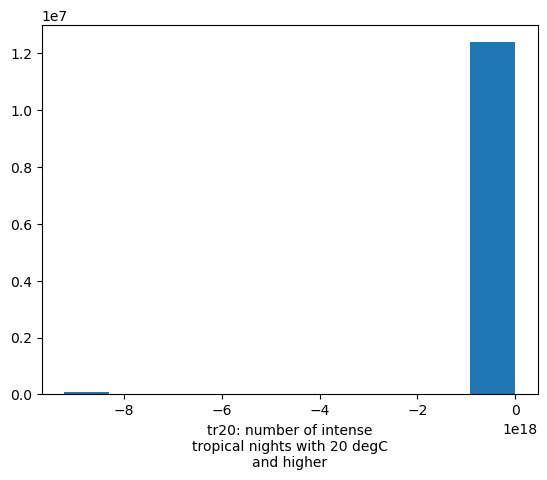

In [7]:
# visualize the data
data['climatology-tr-monthly-mean'].astype(float).plot()

If we want to view the data as a 2-D surface plotted at a specific instance in time, we can use the `.plot()` method to specify the time index we want to plot.
Because we are working with a `.nc` file that has been loaded as an `xarray.Dataset` object, we can use the `.sel()` method to select the time index we want to plot directly, we do not need to calculate or search for the index value.

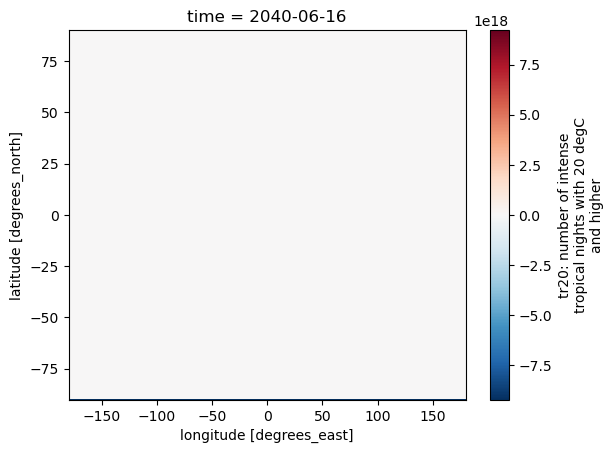

In [8]:
# surface plot of the data
data['climatology-tr-monthly-mean'].sel(time='2040-06-16').astype(float).plot()